# Deep Learning - Nasir Hussain - 2021/03/13

# 5 Fundamentals of machine learning

## 5.3 Improving model fit

- steps 
  - first overfit
  - refine generalization by fighting overfitting
- three common problems
  - Training doesn’t get started: your training loss doesn’t go down over time.
  - Training gets started just fine, but your model doesn’t meaningfully generalize: you can’t beat the common-sense baseline you set.
  - Training and validation loss both go down over time, and you can beat your baseline, but you don’t seem to be able to overfit, which indicates you’re still underfitting.


### 5.3.1 Tuning key gradient descent parameters
- Sometimes training doesn’t get started, or it stalls too early.
  - Your loss is stuck. 
  - fit a model to random data
  - Reasons
    - configuration of the gradient descent process 
      - choice of optimizer
      - the distribution of initial values
      - learning rate
      - batch size 
  - Solution
    - tune
      - learning rate
        - Lowering or increasing the learning rate. A learning rate that is too high may lead to updates that vastly overshoot a proper fit, like in the preceding example, and a learning rate that is too low may make training so slow that it appears to stall.
      - batch size
        - Increasing the batch size. A batch with more samples will lead to gradients that are more informative and less noisy (lower variance).

In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow import keras 
from tensorflow.keras import layers

In [2]:
# Listing 5.7 Training an MNIST model with an incorrectly high learning rate
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
 
model = keras.Sequential([
  layers.Dense(512, activation="relu"),
  layers.Dense(10, activation="softmax")
])
model.compile(
    optimizer=keras.optimizers.RMSprop(1.),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"])
model.fit(
  train_images, 
  train_labels,
  epochs=10,
  batch_size=128,
  validation_split=0.2)

11501568/11490434 [==============================] - 0s 0us/step
Epoch 1/10
375/375 [==============================] - 6s 4ms/step - loss: 520.6833 - accuracy: 0.3016 - val_loss: 2.2709 - val_accuracy: 0.1943
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 3.2275 - accuracy: 0.2320 - val_loss: 2.2048 - val_accuracy: 0.2344
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 2.7367 - accuracy: 0.2323 - val_loss: 2.3790 - val_accuracy: 0.2064
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 3.6080 - accuracy: 0.2461 - val_loss: 2.6200 - val_accuracy: 0.2072
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 2.6839 - accuracy: 0.2260 - val_loss: 2.1962 - val_accuracy: 0.2202
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 2.4999 - accuracy: 0.2313 - val_loss: 2.7546 - val_accuracy: 0.2503
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 2.5368 

In [3]:
# Listing 5.8 The same model with a more appropriate learning rate
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 2s 3ms/step - loss: 0.3876 - accuracy: 0.9115 - val_loss: 0.1454 - val_accuracy: 0.9587
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1384 - accuracy: 0.9644 - val_loss: 0.1575 - val_accuracy: 0.9668
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1099 - accuracy: 0.9736 - val_loss: 0.1731 - val_accuracy: 0.9683
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0951 - accuracy: 0.9790 - val_loss: 0.1829 - val_accuracy: 0.9721
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0885 - accuracy: 0.9821 - val_loss: 0.2786 - val_accuracy: 0.9647
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0859 - accuracy: 0.9841 - val_loss: 0.2155 - val_accuracy: 0.9709
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0759 - accuracy: 0.9861 - val_loss: 0.2245 - val_accuracy: 0.9734
Epoch 

### 5.3.2 Leveraging better architecture priors
- model fits
- validation metrics aren’t improving at all
- model trains but doesn’t generalize
- Reasons
  - fundamentally wrong with your approach
- Solutions
  - input data dosen't contain sufficient information
    - no solution
  - model not suited for the problem
    - change the model

### 5.3.3 Increasing model capacity
- model fits
- validation metrics are going down
- Reason
  - sone thing wrong with representational power of your model
- Solution
  - need a bigger model
  - one with more capacity
  - one able to store more information
  - increase representational power
    - adding more layers
    - using bigger layers
    - using kinds of layers that are more appropriate


In [4]:
# Listing 5.9 A simple logistic regression on MNIST
model = keras.Sequential([layers.Dense(10, activation="softmax")])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_small_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 1s 3ms/step - loss: 0.6740 - accuracy: 0.8348 - val_loss: 0.3573 - val_accuracy: 0.9038
Epoch 2/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3517 - accuracy: 0.9024 - val_loss: 0.3086 - val_accuracy: 0.9128
Epoch 3/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3157 - accuracy: 0.9114 - val_loss: 0.2912 - val_accuracy: 0.9162
Epoch 4/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2997 - accuracy: 0.9158 - val_loss: 0.2821 - val_accuracy: 0.9215
Epoch 5/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2898 - accuracy: 0.9191 - val_loss: 0.2774 - val_accuracy: 0.9215
Epoch 6/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2829 - accuracy: 0.9210 - val_loss: 0.2710 - val_accuracy: 0.9246
Epoch 7/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2781 - accuracy: 0.9225 - val_loss: 0.2685 - val_accuracy: 0.9256
Epoch 

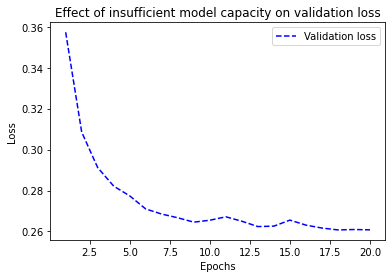

In [5]:
# plot the curve
import matplotlib.pyplot as plt
val_loss = history_small_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
 label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

- model fit but not overfitt

In [6]:
# A simple logistic regression on MNIST with 96 units
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax"),
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_large_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 2s 4ms/step - loss: 0.3619 - accuracy: 0.8983 - val_loss: 0.1826 - val_accuracy: 0.9479
Epoch 2/20
375/375 [==============================] - 2s 5ms/step - loss: 0.1613 - accuracy: 0.9529 - val_loss: 0.1342 - val_accuracy: 0.9608
Epoch 3/20
375/375 [==============================] - 3s 7ms/step - loss: 0.1135 - accuracy: 0.9660 - val_loss: 0.1196 - val_accuracy: 0.9649
Epoch 4/20
375/375 [==============================] - 2s 6ms/step - loss: 0.0880 - accuracy: 0.9736 - val_loss: 0.1071 - val_accuracy: 0.9702
Epoch 5/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0699 - accuracy: 0.9791 - val_loss: 0.1039 - val_accuracy: 0.9703
Epoch 6/20
375/375 [==============================] - 1s 4ms/step - loss: 0.0577 - accuracy: 0.9832 - val_loss: 0.1015 - val_accuracy: 0.9723
Epoch 7/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0488 - accuracy: 0.9851 - val_loss: 0.0973 - val_accuracy: 0.9747
Epoch 

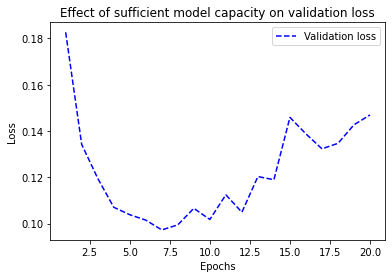

In [7]:
# plot the curve
import matplotlib.pyplot as plt
val_loss = history_large_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
 label="Validation loss")
plt.title("Effect of sufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

## 5.0.3 Data preprocessing, feature engineering, and feature learning

### 5.0.3.1 Data preprocessing for neural networks

- vectorization
  - turning data into tensors of floating point
- normalization
  - data
    - large values / heterogeneous
      - can trigger large gradient updates
        - prevent the network from converging
    - Take small values
      - Typically, most values should be in the 0–1 range.
    - Be homogenous
      - all features should take values in roughly the same range.
  - solution
    - Normalize each feature independently to have a mean of 0.
    - Normalize each feature independently to have a standard deviation of 1. 
- handling missing values
  - input missing values as 0
  - artificially generate training samples with missing entries
    - copy some training samples several times, and drop some of the features that you expect are likely to be missing in the test dat
- feature extraction